In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import r2_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, mean_absolute_error
from sklearn.preprocessing import label_binarize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

def plot_confusion_matrix(
    working_dir, cm, target_names, title="Confusion matrix", cmap=None, normalize=False
):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(9, 8))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                f"{cm[i, j]:0.4f}",
                horizontalalignment="center",
                color="black",
                # color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                f"{cm[i, j]:,}",
                horizontalalignment="center",
                color="black",
                # color="white" if cm[i, j] > thresh else "black",
            )

    plt.ylabel("True label")
    plt.xlabel(f"Predicted label\naccuracy={accuracy:0.4f}; misclass={misclass:0.4f}")

    #plt.savefig(os.path.join(working_dir, title + ".pdf"))
    #plt.savefig(os.path.join(working_dir, title + ".png"))
    #plt.clf()


def print_classification_report(y_true, y_pred):
    """
    Prints classification report to stdout.

    Args:
        y_true (nparray): 1D npy array containing int values for class
        y_pred (nparray): 1D npy array containing int values for predicted class
        train_gen (Keras Generator): Training generator used for model training, used for labels
    """
    print("Classification Report")
    print(classification_report(y_true, y_pred))



In [3]:
df = pd.read_csv("shic_res.csv")

fdf = df
fdf.loc[df["pred"] == "neutral", "pred"] = "neut"
fdf.loc[df["pred"] == "hard", "pred"] = "sdn"
fdf.loc[df["pred"] == "soft", "pred"] = "ssv"
fdf.loc[df["pred"] == "linkedSoft", "pred"] = "linkedssv"
fdf.loc[df["pred"] == "linkedHard", "pred"] = "linkedsdn"
fdf.loc[(df["sweep"] == "sdn") & (df["window"] != 5), "sweep"] = "linkedsdn"
fdf.loc[(df["sweep"] == "ssv") & (df["window"] != 5), "sweep"] = "linkedssv"

fdf.head()

,rep,sweep,window,pred,neut_prob,softlinked_prob,soft_prob,hard_prob,hardlinked_prob
0,0,neut,0,linkedsdn,0.296724,0.292262,0.050371,0.034892,0.325751
1,0,neut,1,neut,0.322944,0.264206,0.083218,0.026427,0.303206
2,0,neut,10,linkedsdn,0.318198,0.285554,0.032250,0.033553,0.330445
3,0,neut,2,neut,0.229401,0.212812,0.173151,0.187107,0.197528
4,0,neut,3,neut,0.242764,0.223390,0.203955,0.108149,0.221742


In [4]:
lab_dict = {0: "neut", 1: "sdn", 2: "ssv", 3: "linkedsdn", 4: "linkedssv"}
dict_lab = {v:k for k,v in lab_dict.items()}
fdf["num_pred"] = [dict_lab[i] for i in fdf["pred"]] 
fdf["num_true"] = [dict_lab[i] for i in fdf["sweep"]]


In [5]:
fdf = fdf[(fdf["sweep"] != "linkedsdn") & (fdf["sweep"] != "linkedssv")]
fdf = fdf[(fdf["window"] == 5)]

fdf

,rep,sweep,window,pred,neut_prob,softlinked_prob,soft_prob,hard_prob,hardlinked_prob,num_pred,num_true
6,0,neut,5,neut,0.313869,0.277556,0.078079,0.032865,0.297631,0,0
17,1,neut,5,neut,0.318098,0.284763,0.058054,0.031846,0.307238,0,0
28,10,neut,5,linkedsdn,0.272664,0.268919,0.094440,0.083521,0.280456,3,0
39,100,neut,5,ssv,0.158889,0.155628,0.282539,0.248604,0.154340,2,0
50,1000,neut,5,neut,0.235058,0.223872,0.191793,0.121467,0.227811,0,0
...,...,...,...,...,...,...,...,...,...,...,...
164969,995,ssv,5,sdn,0.065456,0.062946,0.379667,0.408199,0.083733,1,2
164980,996,ssv,5,linkedsdn,0.268871,0.268391,0.118540,0.062019,0.282179,3,2
164991,997,ssv,5,neut,0.318941,0.285705,0.053238,0.047213,0.294903,0,2
165002,998,ssv,5,ssv,0.121098,0.110106,0.337763,0.307060,0.123973,2,2


Classification Report
              precision    recall  f1-score   support

   linkedsdn       0.00      0.00      0.00         0
   linkedssv       0.00      0.00      0.00         0
        neut       0.59      0.42      0.49      5001
         sdn       0.62      0.51      0.56      5001
         ssv       0.50      0.35      0.41      5000

    accuracy                           0.43     15002
   macro avg       0.34      0.26      0.29     15002
weighted avg       0.57      0.43      0.49     15002



/nas/longleaf/rhel8/apps/anaconda/2021.11/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/longleaf/rhel8/apps/anaconda/2021.11/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/longleaf/rhel8/apps/anaconda/2021.11/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

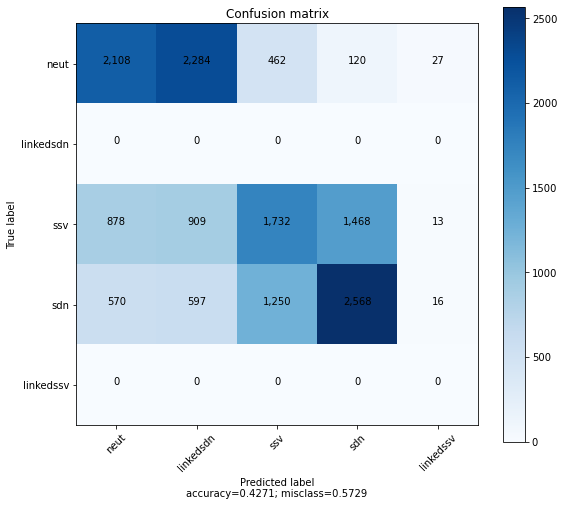

In [6]:
print_classification_report(fdf["sweep"], fdf["pred"])
plot_confusion_matrix('.', confusion_matrix(fdf["sweep"], fdf["pred"], labels=fdf["pred"].unique()), list(fdf["pred"].unique()))


In [7]:
fdf.head()


,rep,sweep,window,pred,neut_prob,softlinked_prob,soft_prob,hard_prob,hardlinked_prob,num_pred,num_true
6,0,neut,5,neut,0.313869,0.277556,0.078079,0.032865,0.297631,0,0
17,1,neut,5,neut,0.318098,0.284763,0.058054,0.031846,0.307238,0,0
28,10,neut,5,linkedsdn,0.272664,0.268919,0.094440,0.083521,0.280456,3,0
39,100,neut,5,ssv,0.158889,0.155628,0.282539,0.248604,0.154340,2,0
50,1000,neut,5,neut,0.235058,0.223872,0.191793,0.121467,0.227811,0,0


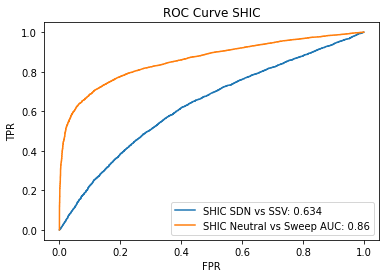

In [8]:
"""Plot ROC curve by binarizing neutral/sweep."""

# Plot sdn/ssv distinction
sweep_idxs = np.transpose(np.array((fdf["num_true"] > 0)).nonzero())
sweep_labs = np.array(fdf["num_true"])[sweep_idxs]

sdn_probs = fdf[fdf["num_true"] > 0]["hard_prob"]

swp_fpr, swp_tpr, thresh = roc_curve(sweep_labs, sdn_probs, pos_label=1)
swp_auc_val = auc(swp_fpr, swp_tpr)
plt.plot(
    swp_fpr,
    swp_tpr,
    label=f"SHIC SDN vs SSV: {swp_auc_val:.4}",
)

# Coerce all ssvs into sweep binary pred
labs = np.array(fdf["num_true"])
labs[labs > 1] = 1
pred_probs = np.sum(np.array([fdf["hard_prob"], fdf["soft_prob"]]).T, axis=1)

# Plot ROC Curve
fpr, tpr, thresh = roc_curve(labs, pred_probs)
auc_val = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"SHIC Neutral vs Sweep AUC: {auc_val:.2}")

plt.title(f"ROC Curve SHIC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()


Text(0, 0.5, 'Precision')

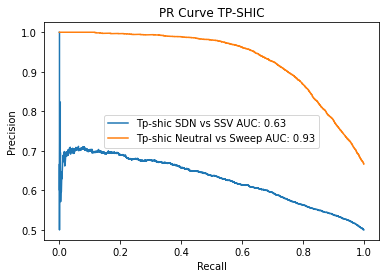

In [9]:
name="TP-SHIC"
"""Plot PR curve by binarizing neutral/sweep."""
# Plot sdn/ssv distinction
sweep_idxs = np.transpose(np.array((fdf["num_true"] > 0)).nonzero())
sweep_labs = np.array(fdf["num_true"])[sweep_idxs]

sweep_labs[sweep_labs == 1] = 1
sweep_labs[sweep_labs == 2] = 0

if len(np.unique(fdf["num_true"])) > 2:
    sdn_probs = fdf[fdf["num_true"] > 0]["hard_prob"] / (
        fdf[fdf["num_true"] > 0]["hard_prob"]
        + fdf[fdf["num_true"] > 0]["soft_prob"]
    )

    swp_prec, swp_rec, swp_thresh = precision_recall_curve(
        sweep_labs.flatten(), sdn_probs
    )
    swp_auc_val = auc(swp_rec, swp_prec)
    plt.plot(
        swp_rec,
        swp_prec,
        label=f"{name.capitalize()} SDN vs SSV AUC: {swp_auc_val:.2}",
    )

# Coerce all ssvs into sweep binary pred
labs = np.array(fdf["num_true"])
labs[labs > 1] = 1
pred_probs = np.sum(np.array([fdf["hard_prob"], fdf["soft_prob"]]).T, axis=1)

# Plot PR Curve for binarized labs
prec, rec, thresh = precision_recall_curve(labs, pred_probs)
auc_val = auc(rec, prec)
plt.plot(rec, prec, label=f"{name.capitalize()} Neutral vs Sweep AUC: {auc_val:.2}")

plt.title(f"PR Curve {name}")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")

In [10]:
name="Timesweeper"
"""Plot PR curve by binarizing neutral/sweep."""
# Plot sdn/ssv distinction

filt_df = fdf[(fdf["sdn_prob"] > 0.0) & (fdf["ssv_prob"] > 0.0)]

sweep_idxs = np.transpose(np.array((filt_df["true"] > 0)).nonzero())
sweep_labs = np.array(filt_df["true"])[sweep_idxs]

sweep_labs[sweep_labs == 1] = 1
sweep_labs[sweep_labs == 2] = 0

if len(np.unique(filt_df["true"])) > 2:
    sdn_probs = filt_df[filt_df["true"] > 0]["sdn_prob"] / (
        filt_df[filt_df["true"] > 0]["sdn_prob"]
        + filt_df[filt_df["true"] > 0]["ssv_prob"]
    )

    swp_prec, swp_rec, swp_thresh = precision_recall_curve(
        sweep_labs.flatten(), sdn_probs
    )
    swp_auc_val = auc(swp_rec, swp_prec)
    plt.plot(
        swp_rec,
        swp_prec,
        label=f"{name.capitalize()} SDN vs SSV AUC: {swp_auc_val:.2}",
    )

# Coerce all ssvs into sweep binary pred
labs = np.array(fdf["true"])
labs[labs > 1] = 1
pred_probs = np.sum(np.array([fdf["sdn_prob"], fdf["ssv_prob"]]).T, axis=1)

# Plot PR Curve for binarized labs
prec, rec, thresh = precision_recall_curve(labs, pred_probs)
auc_val = auc(rec, prec)
plt.plot(rec, prec, label=f"{name.capitalize()} Neutral vs Sweep AUC: {auc_val:.2}")

plt.title(f"PR Curve {name}")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")

KeyError: 'sdn_prob'